### Imports

In [3]:
from IPython.core.debugger import set_trace

#%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import dataframe_image as dfi

import string

#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library

plt.style.use(style="seaborn")

In [4]:
#set filepath constants
NLP_TOPIC_RECOGNITION_FILEPATH = '../NLP Topic Recognition'
#NLP_MODEL_FILEPATH = '../NLP Model Training/model_100K_glove'
#NLP_MODEL_FILEPATH = '../NLP Model Training/model_100K_glove_91'
NLP_MODEL_FILEPATH = '../NLP Model Training/model_1M_glove'
# TEXTUAL_RAW_DATA_FILEPATH = '../Data/textual_raw'
TEXTUAL_RAW_DATA_FILEPATH = '../Data/Files_full'
## Glove 0.91
#OUTPUT_DATASET_FILEPATH = "glove_1M_full_dates_min.csv"
# OUTPUT_DATASET_FILEPATH = "glove_100k_91_min.csv"
# OUTPUT_DATASET_FILEPATH = "BTC_open_close.csv"
# OUTPUT_DATASET_FILEPATH = "Dataset_sentiment_100K_91_glove_filtered_full_end_start.csv"
# OUTPUT_DATASET_FILEPATH = "Dataset_sentiment_100K_glove_91_filtered_full_user_averaged.csv"
# OUTPUT_DATASET_FILEPATH = "Dataset_sentiment_100K_glove_91_filtered_full_user_weights_user_averaged.csv"

## Glove standar
# OUTPUT_DATASET_FILEPATH = "Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"
# OUTPUT_DATASET_FILEPATH = "Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
# OUTPUT_DATASET_FILEPATH = "Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"

## BERT
OUTPUT_DATASET_FILEPATH = "Dataset_sentiment_BERT_trainable_full_dates_min.csv"
# OUTPUT_DATASET_FILEPATH_PREV = "Dataset_sentiment_BERT_trainable.csv"
# OUTPUT_DATASET_FILEPATH = "Dataset_sentiment_BERT_trainable_full.csv"

In [5]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(NLP_TOPIC_RECOGNITION_FILEPATH)
#from topic_recognition import *
#from NLP_class import *

#### Import Data

In [5]:
#bert.model.summary()
SENTIMENT_LABELLED_DATA_FILEPATH = '..\Data\Sentiment Analysis Dataset.csv'
txt_data = pd.read_csv(SENTIMENT_LABELLED_DATA_FILEPATH , sep='|', names=['col1'])

#split data into columns with ','
txt_data = txt_data.col1.str.split(',',  3, expand=True)
txt_data.columns = list(txt_data.iloc[0])
txt_data = txt_data.drop(0)
txt_data.index = np.subtract(txt_data.index, 1)

### Data Analysis and Visualization

#### Labelled Data

In [11]:
dataset = pd.concat([txt_data['SentimentText'], txt_data['Sentiment']], axis = 1)
dataset.columns = ['text', 'target']

In [44]:
df_styled = dataset.describe().style.highlight_null(null_color='grey')
df_styled.export_png('df_styled_describe.png')
df_styled

,text_len,words_count,unique_word_count,mean_word_length,punctuation_count
count,1577838.000000,1577838.000000,1577838.000000,1577812.000000,1577838.000000
mean,75.040838,13.432227,12.866865,4.832994,4.476678
std,36.403109,6.995439,6.446420,1.340082,3.703503
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,45.000000,8.000000,8.000000,4.076923,2.000000
50%,70.000000,12.000000,12.000000,4.571429,4.000000
75%,105.000000,19.000000,18.000000,5.238095,6.000000
max,374.000000,64.000000,38.000000,137.000000,121.000000


In [72]:
#df_styled = dataset.sample(5).style.highlight_null(null_color='grey')
df_styled.export_png('df_styled_sample4.png')
df_styled

,text,target,text_len,words_count,unique_word_count,mean_word_length,punctuation_count
1021812,Le mans I'm gunna miss it But iplayer is amazing. COME ON TOSELAND!,0,71,13,13,4.230769,3
285589,@lnzsho how the flowers lookin? Miss ya!,1,41,7,7,4.857143,3
96600,@crushedjuliet update woman! and why didnt u answer my call! grrr,0,66,11,11,5.000000,3
981021,Listening to 94.9 and the 94.9 van is behind me Haha,1,53,11,10,3.818182,2
398609,@RitchardFewell Aww too bad! Next year,1,39,6,6,5.500000,2


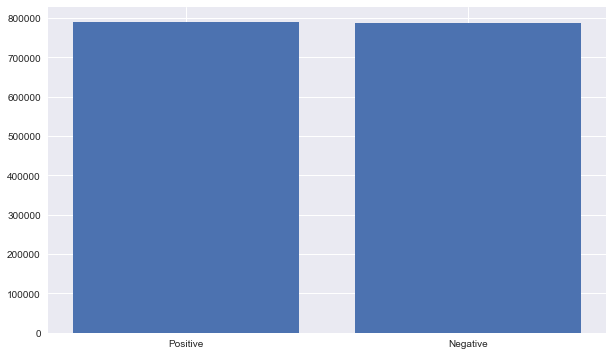

In [62]:
#check for class imbalance
fig = plt.figure(1, figsize=(10, 6))
plt.bar(["Positive", "Negative"], [dataset[dataset['target']=='1'].shape[0], dataset[dataset['target']=='0'].shape[0] ])
plt.savefig('class_imbalance.png',facecolor=fig.get_facecolor(), edgecolor='none')

##### Feature Analysis

In [26]:
def plot_target_based_features(feature, x = None, log = False, save = False):
    x1 = dataset[dataset.target == '1'][feature]
    x2 = dataset[dataset.target == '0'][feature]
    fig = plt.figure(1, figsize=(10, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x2, alpha=0.7, color="firebrick", bins=100, label = "negative")
    _ = plt.hist(x1, alpha=0.7, color="seagreen", bins=100, label = "positive")
    plt.legend(prop={'size': 20})
    if x:
        plt.xlim(0,x)
    if log:
        plt.yscale('log')
    if save:
        plt.savefig('features_' + feature + '_log.png',facecolor=fig.get_facecolor(), edgecolor='none')

In [21]:
# Generate Feuatures

#average tweet length
dataset["text_len"] = dataset.text.map(lambda x: len(x))

#average number of words per tweet
dataset["words_count"] = dataset.text.str.split().map(lambda x: len(x))

#average number of unique words per tweet
dataset["unique_word_count"] = dataset.text.map(lambda x: len(set(str(x).split())))

#average word length per tweet
dataset["mean_word_length"] = dataset.text.map(lambda x: np.mean([len(w) for w in str(x).split()]))

#average number of punction per tweet
dataset["punctuation_count"] = dataset.text.map(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [28]:
# Plot feature distributions

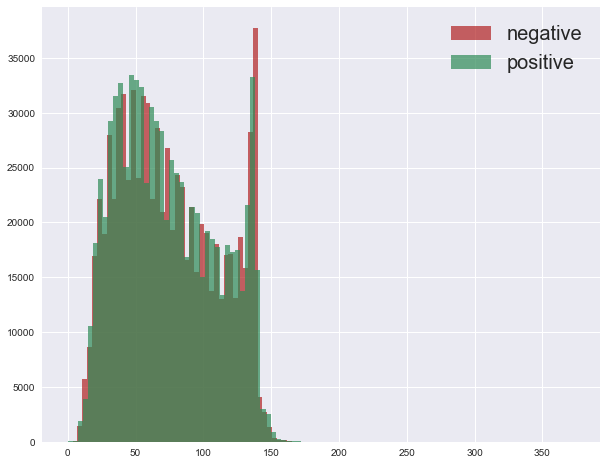

In [27]:
plot_target_based_features("text_len")

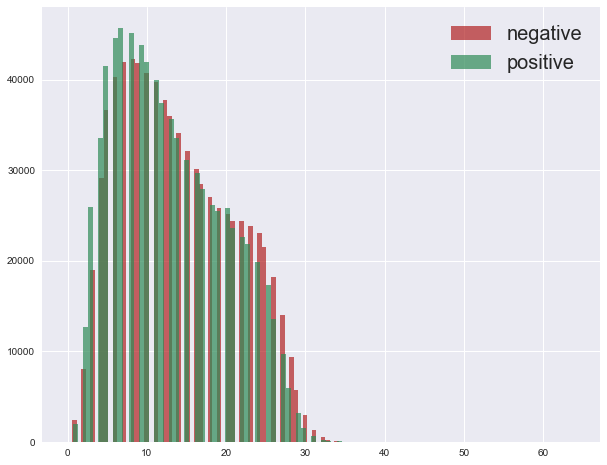

In [29]:
plot_target_based_features("words_count")

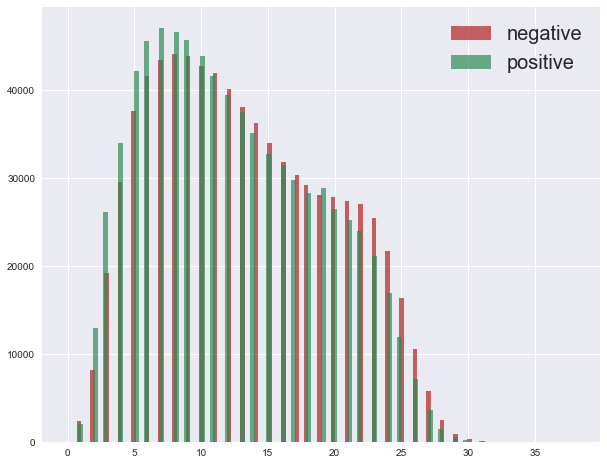

In [30]:
plot_target_based_features("unique_word_count")

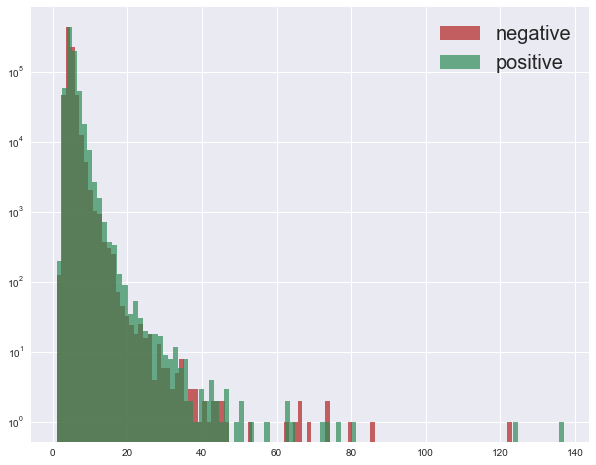

In [33]:
plot_target_based_features("mean_word_length", log = True)

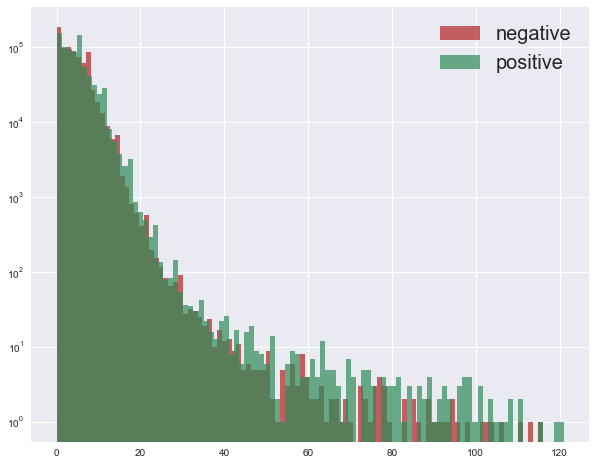

In [34]:
plot_target_based_features("punctuation_count", log = True)

#### Unlabeled Data

In [7]:
my_df = pd.read_csv('./full_df.csv')
my_df

C:\Users\Konst\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,to,year,text_len,words_count,unique_word_count,month,day,hour,minute
0,0,PaulHillierdesu,2017-08-01 23:59:55,0,4,"""Would it be illegal for a Canadian bank to ma...",NaN,NaN,NaN,892535396625768449,https://twitter.com/PaulHillierdesu/status/892...,NaN,2017,89,16,16,2017-08,2017-08-01,2017-08-01 23,2017-08-01 23:59
1,1,bitcoinagile,2017-08-01 23:59:53,0,0,"""#bitcoin: Whats going on with the digital cur...",NaN,NaN,#bitcoin #blockchain #digitalcurrency #BTC,892535387280867328,https://twitter.com/bitcoinagile/status/892535...,NaN,2017,197,13,13,2017-08,2017-08-01,2017-08-01 23,2017-08-01 23:59
2,2,MookieWilson7,2017-08-01 23:59:52,0,1,"""Bitcoin splits, but clone off to slow start -...",NaN,NaN,NaN,892535382784360448,https://twitter.com/MookieWilson7/status/89253...,NaN,2017,142,12,12,2017-08,2017-08-01,2017-08-01 23,2017-08-01 23:59
3,3,Adrian_Xt,2017-08-01 23:59:49,0,1,"""From the #Bitcoin White Paper: """"We define an...",NaN,NaN,#Bitcoin #segwit,892535372139249664,https://twitter.com/Adrian_Xt/status/892535372...,howelzy,2017,197,25,24,2017-08,2017-08-01,2017-08-01 23,2017-08-01 23:59
4,4,austfintech,2017-08-01 23:59:49,0,5,"""#Bitcoin: What's going on with the #digitalcu...",NaN,NaN,#Bitcoin #digitalcurrency #cryptocurrency #bit...,892535371958898688,https://twitter.com/austfintech/status/8925353...,NaN,2017,201,14,14,2017-08,2017-08-01,2017-08-01 23,2017-08-01 23:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17736143,17736143,coinstats,2019-01-22 00:00:01,0,0,"""Bitcoin - BTC Price: $3,577.77 Change in 1h: ...",NaN,NaN,#Bitcoin #BTC,1087500091764559872,https://twitter.com/coinstats/status/108750009...,NaN,2019,109,16,16,2019-01,2019-01-22,2019-01-22 00,2019-01-22 00:00
17736144,17736144,cryptonirvana,2019-01-22 00:00:01,0,0,"""Total #crypto market cap is $114,840,478,034 ...",NaN,NaN,#crypto #bitcoin #cryptocurrency #ethereum,1087500091546587141,https://twitter.com/cryptonirvana/status/10875...,NaN,2019,95,12,12,2019-01,2019-01-22,2019-01-22 00,2019-01-22 00:00
17736145,17736145,InfoProNetwork,2019-01-22 00:00:01,0,0,"""IAM Platform Curated Retweet: Via: https://tw...",NaN,NaN,#FinTech #Cryptocurrency #Blockchain #Bitcoin ...,1087500090749661186,https://twitter.com/InfoProNetwork/status/1087...,NaN,2019,327,31,30,2019-01,2019-01-22,2019-01-22 00,2019-01-22 00:00
17736146,17736146,InfoProNetwork,2019-01-22 00:00:01,0,0,"""IAM Platform Curated Retweet: Via: https://tw...",NaN,NaN,#blockchain #bitcoin #IAMPlatform #TopInfluenc...,1087500090628063232,https://twitter.com/InfoProNetwork/status/1087...,NaN,2019,280,23,23,2019-01,2019-01-22,2019-01-22 00,2019-01-22 00:00


In [8]:
# my_df2["month"] =  my_df["date"].apply(lambda x : str(x)[:7])
# my_df2["day"] =  my_df["date"].apply(lambda x : str(x)[:10])
# my_df2["hour"] =  my_df["date"].apply(lambda x : str(x)[:13])
# my_df2["minute"] =  my_df["date"].apply(lambda x : str(x)[:16])

In [82]:
df_styled = my_df.sample(5).style.highlight_null(null_color='grey')
#df_styled.export_png('df_unlabelled_sample.png')
df_styled

,Unnamed: 0,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,to,year,text_len,words_count,unique_word_count,month,day,hour,minute
16918890,16918890,CryptoStatsBot,2018-12-15 04:59:14,0,0,"""Biggest Losers (1 hr) Mithril $MITH -1.61% Ontology $ONT -1.57% Metaverse ETP $ETP -1.47% aelf $ELF -1.28% Bitcoin Gold $BTG -0.93%""",nan,nan,nan,1073804653341507589,https://twitter.com/CryptoStatsBot/status/1073804653341507589,nan,2018,133,21,21,2018-12,2018-12-15,2018-12-15 04,2018-12-15 04:59
9923778,9923778,StarJagjeetJena,2018-04-02 05:38:50,0,0,"""@Shahasree @safi_hyder @Balbhad23690372 @BeingGauravMore @PravinGadave 0x3c241968d76bdefc6200ead3d31bda33a192ec4e""",nan,@Shahasree @safi_hyder @Balbhad23690372 @BeingGauravMore @PravinGadave,nan,980680937838059520,https://twitter.com/StarJagjeetJena/status/980680937838059520,W_Bitcoin,2018,115,6,6,2018-04,2018-04-02,2018-04-02 05,2018-04-02 05:38
6236923,6236923,startupcrunch,2018-01-12 22:46:06,0,0,"""HSBC Just Released a Bitcoin Stocks List, but Our 2 Picks Are the Real Winners http://dlvr.it/QB0dSX #bitcoin pic.twitter.com/PRCRDaNdoS""",nan,nan,#bitcoin,951948429051117568,https://twitter.com/startupcrunch/status/951948429051117568,nan,2018,138,18,18,2018-01,2018-01-12,2018-01-12 22,2018-01-12 22:46
14591342,14591342,TheTradingTitan,2018-09-02 12:49:44,1,3,"""Good morning crypto traders and hodlers ! Green morning for #Bitcoin , reat of the market seeing a little pullback but seems to be the bull market is back n action baby""",nan,nan,#Bitcoin,1036234721963986944,https://twitter.com/TheTradingTitan/status/1036234721963986944,nan,2018,170,32,29,2018-09,2018-09-02,2018-09-02 12,2018-09-02 12:49
10621949,10621949,ArbingTool,2018-04-21 12:31:47,0,0,"""#XRP Buy at #BTCTurk and sell at #Cex. Ratio: 1.61% Buy at #BTCTurk and sell at #Bittrex. Ratio: 2.97% Buy at #BTCTurk and sell at #Bitfinex. Ratio: 2.62% Buy at #Koineks and sell at #Cex. Ratio: 3.16% #bitcoin #arbitrage #arbitraj #arbingtool http://arbing.info""",nan,nan,#XRP #BTCTurk #Cex #BTCTurk #Bittrex #BTCTurk #Bitfinex #Koineks #Cex #bitcoin #arbitrage #arbitraj #arbingtool,987670228782993409,https://twitter.com/ArbingTool/status/987670228782993409,nan,2018,264,42,20,2018-04,2018-04-21,2018-04-21 12,2018-04-21 12:31


In [83]:
df_styled = my_df.describe().style.highlight_null(null_color='grey')
#df_styled.export_png('df_unlabelled_describe.png')
df_styled

,Unnamed: 0,retweets,favorites,year,text_len,words_count,unique_word_count
count,17736148.000000,17736148.000000,17736148.000000,17736148.000000,17736148.000000,17736148.000000,17736148.000000
mean,8868073.500000,1.224518,2.942136,2017.702629,154.735805,18.107412,17.153714
std,5119985.055431,197.451128,593.083903,0.510751,76.565408,10.441553,9.126368
min,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,1.000000
25%,4434036.750000,0.000000,0.000000,2017.000000,100.000000,11.000000,11.000000
50%,8868073.500000,0.000000,0.000000,2018.000000,140.000000,15.000000,15.000000
75%,13302110.250000,0.000000,1.000000,2018.000000,202.000000,22.000000,21.000000
max,17736147.000000,507373.000000,1472110.000000,2019.000000,3984.000000,126.000000,72.000000


##### Feature Analysis

In [120]:
def plot_target_based_features(feature, x = None, log = False, save = False):
    x1 = my_df[feature]
    fig = plt.figure(1, figsize=(10, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x1, alpha=0.7, color="grey", bins=100)
    if x:
        plt.xlim(0,x)
    if log:
        plt.yscale('log')
    if save:
        plt.savefig('features_' + feature + '.png',facecolor=fig.get_facecolor(), edgecolor='none')

In [124]:
# Generate Feuatures

#average tweet length
my_df["text_len"] = my_df.text.map(lambda x: len(x))

#average number of words per tweet
my_df["words_count"] = my_df.text.str.split().map(lambda x: len(x))

#average number of unique words per tweet
my_df["unique_word_count"] = my_df.text.map(lambda x: len(set(str(x).split())))

#average word length per tweet
my_df["mean_word_length"] = my_df.text.map(lambda x: np.mean([len(w) for w in str(x).split()]))

#average number of punction per tweet
my_df["punctuation_count"] = my_df.text.map(lambda x: len([c for c in str(x) if c in string.punctuation]))

KeyboardInterrupt: 

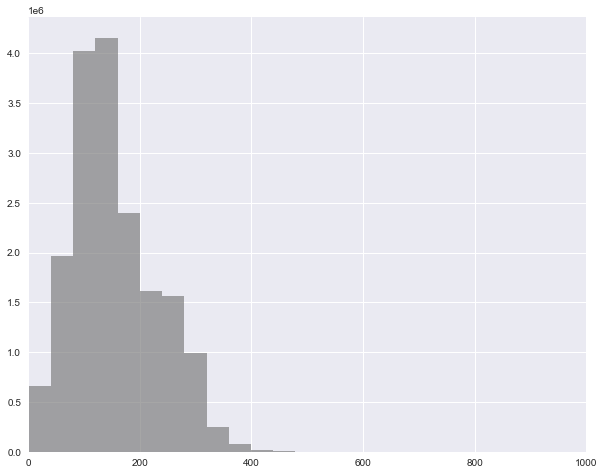

In [121]:
plot_target_based_features("text_len",1000)

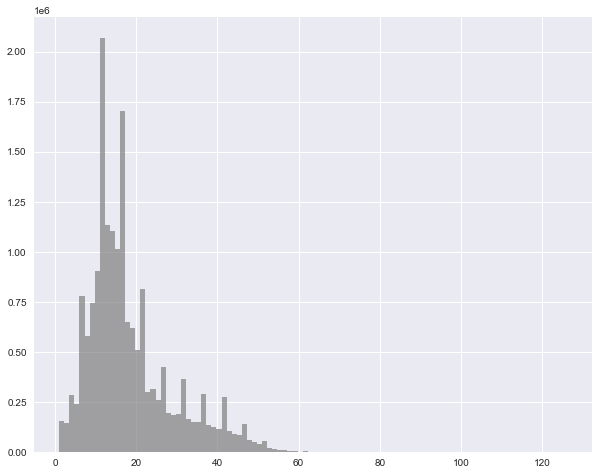

In [125]:
plot_target_based_features("words_count")

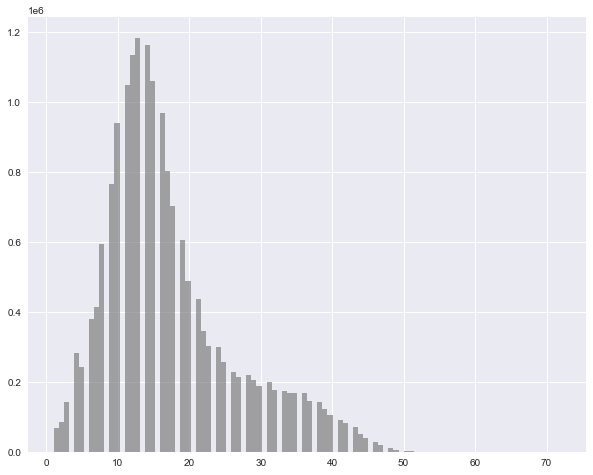

In [122]:
plot_target_based_features("unique_word_count")

##### Number of tweets per timeframe

In [ ]:
#Calculate values
month = my_df.groupby(["month"]).apply(np.size)
print("Tweets per month ready")
day = my_df.groupby(["day"]).apply(np.size)
print("Tweets per day ready")
hour = my_df.groupby(["hour"]).apply(np.size)
print("Tweets per hour ready")
minute = my_df.groupby(["minute"]).apply(np.size)
print("Tweets per minute ready")
users = my_df.groupby(["username"]).apply(np.size)

In [9]:
# Or just import them
month = pd.read_csv("month.csv", index_col = 0)
day = pd.read_csv("day.csv", index_col = 0)
hour = pd.read_csv("hour.csv", index_col = 0)
minute = pd.read_csv("minute.csv", index_col = 0)
users = pd.read_csv("users.csv", index_col = 0)

<BarContainer object of 3 artists>

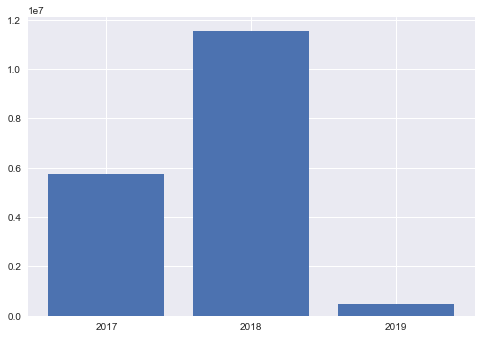

In [99]:
plt.bar(["2017", "2018", "2019"], [my_df[my_df['year']==2017].shape[0], my_df[my_df['year']==2018].shape[0], my_df[my_df['year']==2019].shape[0]  ])
#plt.savefig('year.png',facecolor=fig.get_facecolor(), edgecolor='none')

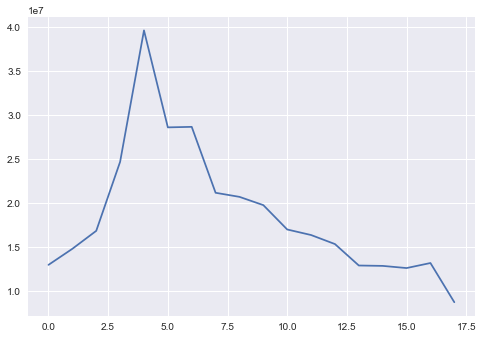

In [100]:
plt.plot(month['0'].values)
#plt.savefig('minute.png',facecolor=fig.get_facecolor(), edgecolor='none')

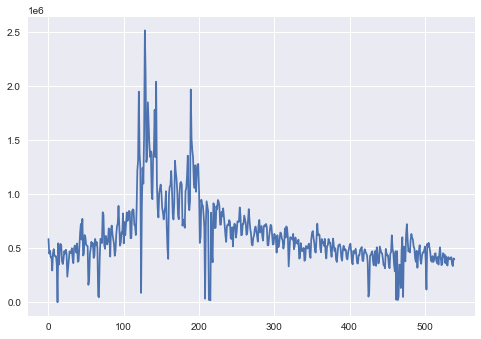

In [101]:
plt.plot(day['0'].values)
#plt.savefig('minute.png',facecolor=fig.get_facecolor(), edgecolor='none')

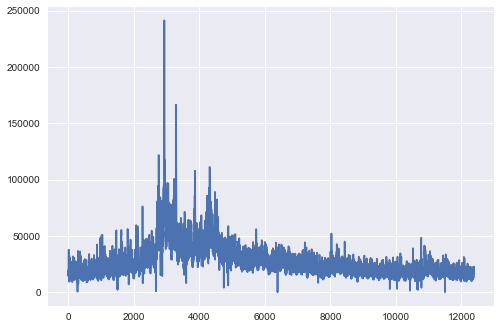

In [102]:
plt.plot(hour['0'].values)
#plt.savefig('minute.png',facecolor=fig.get_facecolor(), edgecolor='none')

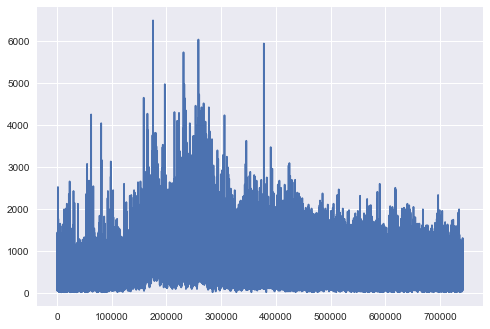

In [103]:
plt.plot(minute['0'].values)
#plt.savefig('minute.png',facecolor=fig.get_facecolor(), edgecolor='none')

##### Spam analysis

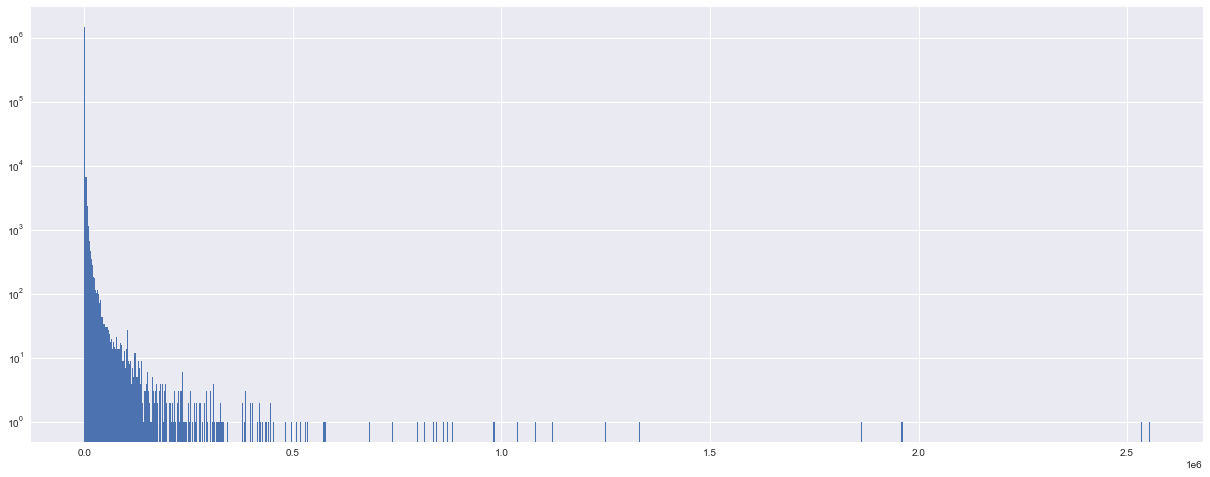

In [104]:
fig = plt.figure(1, figsize=(21, 8))
plt.hist(users,bins = 1000)
plt.yscale('log')
plt.savefig('tweets_per_user_log.png',facecolor=fig.get_facecolor(), edgecolor='none')

In [42]:
def word_frequency(sentence):
    # joins all the sentenses
    sentence =" ".join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','count']).sort_values(by='count',ascending=False)
    word_freq["frequency"] = word_freq["count"]/word_freq.apply(np.sum)["count"]
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','count']).sort_values(by='count',ascending=False)
    word_pairs["frequency"] = word_pairs["count"]/word_pairs.apply(np.sum)["count"]  
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','count']).sort_values(by='count',ascending=False)
    trigrams["frequency"] = trigrams["count"]/trigrams.apply(np.sum)["count"]  
    return word_freq,word_pairs,trigrams

In [30]:
for i in range(0,my_df.shape[0]):
    user = my_df.loc[i]["username"]
    print(my_df.loc[i]["text"], user)
    s = input("Is this spam?")
    if s == 'y':
        users.loc[user]['f'] = users.loc[user]['f'] + 1
    elif s == 'n':
        users.loc[user]['f'] = users.loc[user]['f'] - 1
    elif s == 's':
        break

"Would it be illegal for a Canadian bank to make their own crypto currency like bitcoin?" PaulHillierdesu
Is this spam?n
"#bitcoin: Whats going on with the digital currency? #blockchain #digitalcurrency #BTC https://australianfintech.com.au/bitcoin-whats-going-on-with-the-digital-currency …pic.twitter.com/w0cAw3NgVw" bitcoinagile
Is this spam?y
"Bitcoin splits, but clone off to slow start - http://www.reuters.com/article/us-bitcoin-split-idUSKBN1AH5F1?il=0 … viahttp://news.google.com" MookieWilson7
Is this spam?y
"From the #Bitcoin White Paper: ""We define an electronic coin as a chain of digital signatures."" BTC = ""No"" after #segwit, BCC = ""Yes"".https://twitter.com/howelzy/status/892308205476466689 …" Adrian_Xt
Is this spam?d
"#Bitcoin: What's going on with the #digitalcurrency? https://australianfintech.com.au/bitcoin-whats-going-on-with-the-digital-currency/ … #cryptocurrency #bitointrading #BTC #blockchain #digitalmoney" austfintech
Is this spam?y
"Found an app called @SlideCo

Is this spam?y
"Everything I've read about bitcoin keeps me thinking it's a large scale long con" PosadiStache
Is this spam?n
"#blockchain in #Banking #Fintech #makeyourownlane #Mpgvip #cryptocurrency #AI #defstar5 #ML #IOT #Bitcoin folloRT pic.twitter.com/HYwTrd0oyw" CNY2USD
Is this spam?d
"I profited 3000% and now im exploring altcoin and potential bitcoin trades to make more money. Good luck to you." CryptoEye111
Is this spam?d
"Crypt0's News- Fork Day Edition! (BCH Bitcoin Cash + BTC Bitcoin) PART 1 https://youtu.be/Ueb2G_dz4rA via @YouTube" KchulaniKevin
Is this spam?y
"Bitcoin! What is bitcoin?! Why, if my phone still wants to correct it to ""butt coin,"" does it even matter?! And... http://fb.me/38ITBV8vd" yourlocallauren
Is this spam?n
"I liked a @YouTube video http://youtu.be/UK9viQ2JSLo?a Bitcoin Hard Fork Bitcoin Cash 2nd August" Amit52Sonu
Is this spam?y
"@CoinomiWallet if I have my own private key can I just add bitcoin cash and sweep the key?" freedomstream01
Is this spam

Is this spam?y
"#Bitcoin feud splits the currency in two https://goo.gl/Pd1Nku" Veki551155
Is this spam?y
"I’ll probably get heavy into Bitcoin when it becomes the MySpace of digital currency. Blockchain concept is dope BTW https://twitter.com/techreview/status/892530064755183617 …" ironike_
Is this spam?n
"#Bitcoin Rival Launches in Volatile First Day https://goo.gl/FN5bY2 https://twitter.com/BitcoinWrld/status/892531477950455808/photo/1pic.twitter.com/yYiwqAv8JY" Veki551155
Is this spam?y
"#Bitcoin splits, but clone off to slow start - http://Reuters.com https://goo.gl/yB84vS https://twitter.com/BitcoinWrld/status/892531476100730880/photo/1pic.twitter.com/nDhTV8AibV" Veki551155
Is this spam?y
"The community supporting Bitcoin has suddenly split. http://trib.al/fw0o7tP" MDFBasha
Is this spam?d
"#Bitcoin Bitcoin splits, but clone off to slow start http://dlvr.it/Pb87PX via → http://goo.gl/nnFPIZ" PennyStocksMomo
Is this spam?d
"#TRUTH is the future staring us in the face. @DigiByteCoin

In [33]:
users.to_csv('users.csv')

In [38]:
spam = users[users["f"]>1].index.values
non_spam = users[users["f"]<-1].index.values

In [39]:
spam_tweets = my_df[my_df["username"].isin(spam)]["text"]
spam_tweets

1           "#bitcoin: Whats going on with the digital cur...
2           "Bitcoin splits, but clone off to slow start -...
16          "Bitcoin Cash Supporters Continue to Hold on B...
18          "Price Analysis, August 1: Bitcoin, Ethereum, ...
20          "Bitcoin Cash Supporters Continue to Hold on B...
                                  ...                        
17735418    "Op Ed: #bitcoin Mining Attacks Are Overblown ...
17735506    "Gujarat: Suspended SP gets bail in #bitcoin e...
17735759    "r/CryptoCurrency - This Week In Crypto - #bit...
17735945    "Canal no #bitcoin for BITSTAMP:BTCUSD by Samu...
17735973    "Crypto Markets Near Weekly Lows Following Wee...
Name: text, Length: 216114, dtype: object

In [44]:
len(set(spam_tweets))

213884

In [40]:
non_spam_tweets = my_df[my_df["username"].isin(non_spam)]["text"]
non_spam_tweets

0           "Would it be illegal for a Canadian bank to ma...
14          "So kind of disingenuous to claim its bitcoin....
60          "The #bitcoin #Meetup is in #CenturyCity #LosA...
69          "I'm pretty sure Clams did the same thing. It'...
93          "All ready to launch our #bitcoin #Meetup in 2...
                                  ...                        
17590764    "Train will leave the station in 2019. Next pe...
17590872    "The most powerful country in 2030 will be the...
17591883    "When ""tiny"" @wikileaks was sanctioned from ...
17672389    "Bitcoin price right now.. https://twitter.com...
17715362    "People wear gold because it has value. Gold d...
Name: text, Length: 1558, dtype: object

In [47]:
uni_spam, bi_spam, tri_spam = word_frequency(spam_tweets.sample(2000).values)

In [48]:
uni_spam

,word,count,frequency
8,bitcoin,2339,0.127299
10,http,2076,0.112986
7,blockchain,265,0.014423
9,btc,261,0.014205
19,price,221,0.012028
...,...,...,...
2122,underway,1,0.000054
2125,canceled,1,0.000054
2127,ordered,1,0.000054
2132,minimum,1,0.000054


In [45]:
uni_non_spam, bi_non_spam, tri_non_spam = word_frequency(non_spam_tweets.values)

In [53]:
type(uni_non_spam[uni_non_spam["word"] == "bitcoin"]["frequency"].values[0])

numpy.float64

In [62]:
uni_spam["diff"] = 0
words = uni_non_spam["word"].values
for i,r in uni_spam.iterrows():
    if r["word"] in  words:
        uni_spam.loc[i,"diff"] = r["frequency"]/(uni_non_spam[uni_non_spam["word"] == r["word"]]["frequency"].values[0] + r["frequency"])
    else:
        uni_spam.loc[i,"diff"] = 1

In [70]:
uni_spam = uni_spam.sort_values(by='diff',ascending=False)
uni_spam[uni_spam["count"]>10.].head(40)

,word,count,frequency,diff
774,guide,12,0.000653,1.000000
917,google,12,0.000653,1.000000
1138,india,14,0.000762,1.000000
229,broker,11,0.000599,1.000000
189,crackdown,13,0.000708,1.000000
530,atm,13,0.000708,1.000000
29,startup,11,0.000599,1.000000
225,report,27,0.001469,1.000000
395,amp,14,0.000762,1.000000
78,newsbtc,14,0.000762,1.000000


In [68]:
uni_spam[uni_spam["word"]=="free"]

,word,count,frequency,diff
907,free,13,0.000708,0.354574


In [ ]:
def word_frequency(sentence):
    # joins all the sentenses
    sentence =" ".join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','count']).sort_values(by='count',ascending=False)
    word_freq["frequency"] = word_freq["count"]/word_freq.apply(np.sum)["count"]
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','count']).sort_values(by='count',ascending=False)
    word_pairs["frequency"] = word_pairs["count"]/word_pairs.apply(np.sum)["count"]  
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','count']).sort_values(by='count',ascending=False)
    trigrams["frequency"] = trigrams["count"]/trigrams.apply(np.sum)["count"]  
    return word_freq,word_pairs,trigrams